IMPORT LIBRARY 

In [ ]:
# Mengimport semua library dan function yang dibutuhkan.
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import decomposition
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, Dropout

LOAD DATASET

In [ ]:
# Load dataset dari file 'rawdata.csv' menggunakan fungsi dari library pandas.
data = pd.read_csv('rawdata.csv')

In [ ]:
# Menampilkan data yang telah diload.
data

,SAMPLE_ID,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,snp_10,snp_11,snp_12,snp_13,snp_14,snp_15,snp_16,snp_17,snp_18,snp_19,snp_20,snp_21,snp_22,snp_23,snp_24,snp_25,snp_26,snp_27,snp_28,snp_29,snp_30,snp_31,snp_32,snp_33,snp_34,snp_35,snp_36,snp_37,snp_38,...,snp_9962,snp_9963,snp_9964,snp_9965,snp_9966,snp_9967,snp_9968,snp_9969,snp_9970,snp_9971,snp_9972,snp_9973,snp_9974,snp_9975,snp_9976,snp_9977,snp_9978,snp_9979,snp_9980,snp_9981,snp_9982,snp_9983,snp_9984,snp_9985,snp_9986,snp_9987,snp_9988,snp_9989,snp_9990,snp_9991,snp_9992,snp_9993,snp_9994,snp_9995,snp_9996,snp_9997,snp_9998,snp_9999,snp_10000,STATUS
0,HCB181,1,0,0,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,2,1
1,HCB182,1,0,0,1,1,2,2,1,2,2,2,1,2,1,2,2,2,2,2,0,0,2,2,2,2,2,2,1,1,1,2,0,0,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,2,2,2,2
2,HCB183,1,0,0,1,2,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0,0,2,2,2,2,1,2,1,2,1,2,2,2,0,0,0,0,2,2,...,1,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2
3,HCB184,1,0,0,1,1,2,2,1,2,2,2,1,1,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
4,HCB185,1,0,0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,...,1,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,JPT265,1,0,0,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,1,1,2
85,JPT266,1,0,0,1,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,1,2,2,2,1,2,...,1,1,2,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
86,JPT267,1,0,0,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,0,0,0,0,1,2,2,2,2,2,0,0,2,2,2,2,1,2,...,1,1,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,2,2,1
87,JPT268,1,0,0,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,1,1


In [ ]:
# Label encoding untuk memberi label berupa angka pada kolom 'SAMPLE_ID'.
data['SAMPLE_ID'] = LabelEncoder().fit_transform(data['SAMPLE_ID'])

In [ ]:
# Membagi data menjadi features dan label.
features = data.drop('STATUS', axis=1)
label = data['STATUS']

In [ ]:
# Melakukan Standarisasi menggunakan StandardScaler untuk kumpulan data berisi variabel yang berbeda dalam skala.
features = StandardScaler().fit_transform(features)

SPLIT DATASET

In [ ]:
# Split dataset menjadi 20% test set dan 80% train set.
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1) 

In [ ]:
# Menampung variabel ke variabel x_train_pca, x_test_pca, y_train_pca, dan y_test_pca.
x_train_pca = x_train
x_test_pca = x_test
y_train_pca = y_train
y_test_pca = y_test

In [ ]:
x_train_pca.shape

(71, 10002)

In [ ]:
# Menentukan jumlah class dari label(output) sebesar 2.
num_classes = 2

# WITHOUT PCA

PREPROCESS

In [ ]:
# Mereshape y_train dan y_test
y_train = y_train.values.reshape([-1, 1])
y_test = y_test.values.reshape([-1, 1])

In [ ]:
# One Hot Encoding menggunakan OneHotEncoder yang berfungsi untuk membuat kolom baru dari variabel 
# di mana setiap kategori menjadi kolom baru dengan nilai 0 atau 1 (0 mewakili tidak ada dan 1 mewakili ada).
encoder = OneHotEncoder(sparse=False)
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
# Mereshape x_train dan x_test dari bentuk 2D menjadi bentuk 3D.
x_train = x_train.reshape(-1, 10002, 1)
x_test = x_test.reshape(-1, 10002, 1)

BUILD MODEL



In [ ]:
# Membuat model CNN conv1D dari keras.
model = Sequential()
model.add(Conv1D(64, 2, input_shape=(10002, 1), activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(3))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D(3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [ ]:
# Mengcompile model, optimizer yang digunakan adalah Adadelta optimizer dari keras.
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
# Mengatur jumlah batch_size.
batch_size = 128
# Mengatur jumlah epochs.
epochs = 100
# Fit x_train dan y_train ke model.
model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
1/1 - 18s - loss: 0.7359 - accuracy: 0.4085 - val_loss: 0.7125 - val_accuracy: 0.4444
Epoch 2/100
1/1 - 1s - loss: 0.7220 - accuracy: 0.4507 - val_loss: 0.7101 - val_accuracy: 0.5556
Epoch 3/100
1/1 - 1s - loss: 0.7146 - accuracy: 0.4507 - val_loss: 0.7093 - val_accuracy: 0.4444
Epoch 4/100
1/1 - 1s - loss: 0.6918 - accuracy: 0.5493 - val_loss: 0.7068 - val_accuracy: 0.4444
Epoch 5/100
1/1 - 1s - loss: 0.6679 - accuracy: 0.5634 - val_loss: 0.7083 - val_accuracy: 0.3889
Epoch 6/100
1/1 - 1s - loss: 0.6743 - accuracy: 0.5493 - val_loss: 0.7062 - val_accuracy: 0.3889
Epoch 7/100
1/1 - 1s - loss: 0.6747 - accuracy: 0.6056 - val_loss: 0.7046 - val_accuracy: 0.4444
Epoch 8/100
1/1 - 1s - loss: 0.6632 - accuracy: 0.6479 - val_loss: 0.7046 - val_accuracy: 0.4444
Epoch 9/100
1/1 - 1s - loss: 0.6501 - accuracy: 0.7042 - val_loss: 0.7033 - val_accuracy: 0.4444
Epoch 10/100
1/1 - 1s - loss: 0.6636 - accuracy: 0.5915 - val_loss: 0.7025 - val_accuracy: 0.4444
Epoch 11/100
1/1 - 1s - loss

Di atas menampilkan loss, accuracy, val_loss, dan val_accuracy per epoch dari model CNN tanpa menggunakan PCA. Terlihat seiring bertambahnya epoch, menghasilkan loss yang semakin kecil dan accuracy yang semakin besar. Semakin loss mendekati 0, maka semakin bagus, sedangkan, semakin accuracy mendekati 1, maka semakin bagus.

EVALUATION

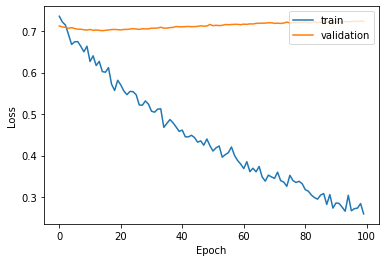

In [ ]:
# Menampilkan hasil evaluasi model dengan grafik, serta menampilkan loss, accuracy, val_loss, dan val_accuracy dari tiap epoch.
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Terlihat dari grafik di atas, perbandingan loss dari train model CNN tanpa PCA dan validation loss model CNN tanpa PCA. Dapat dilihat, loss train model yang dihasilkan turun seiring bertambahnya epoch, sedangkan validation loss yang dihasilkan naik meskipun hanya sedikit tiap epoch.

# WITH PCA

PCA

In [ ]:
mean = tf.reduce_mean(x_train_pca, axis=0)
x_train_centered = x_train_pca-mean
mean = tf.reduce_mean(x_test_pca, axis=0)
x_test_centered = x_test_pca-mean

In [ ]:
# Menggunakan PCA yang diimport dari Sklearn. PCA berfungsi untuk mengurangi dimensi,  
# mengurangi kompleksitas hubungan timbal-balik antara sejumlah besar variabel yang diamati ke sejumlah relatif kecil dari kombinasi linearnya, 
# yang disebut sebagai komponen utama.
pca = decomposition.PCA()
pca.n_components = 64
x_train_pca = pca.fit_transform(x_train_centered)
x_test_pca = pca.transform(x_test_centered)

PREPROCESS

In [ ]:
# Mereshape y_train dan y_test
y_train_pca = y_train_pca.values.reshape([-1, 1])
y_test_pca = y_test_pca.values.reshape([-1, 1])

In [ ]:
# One Hot Encoding menggunakan OneHotEncoder yang berfungsi untuk membuat kolom baru dari variabel 
# di mana setiap kategori menjadi kolom baru dengan nilai 0 atau 1 (0 mewakili tidak ada dan 1 mewakili ada).
encoder = OneHotEncoder(sparse=False)
encoder.fit(y_train_pca)
y_train_pca = encoder.transform(y_train_pca)
y_test_pca = encoder.transform(y_test_pca)

In [ ]:
# Mereshape x_train dan x_test dari bentuk 2D menjadi bentuk 3D.
x_train_pca = x_train_pca.reshape(-1, 64, 1)
x_test_pca = x_test_pca.reshape(-1, 64, 1)

BUILD MODEL

In [ ]:
# Membuat model CNN conv1D dari keras.
model = Sequential()
model.add(Conv1D(64, 3, input_shape=(64, 1), activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Mengcompile model, optimizer yang digunakan adalah Adadelta optimizer dari keras.
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
# Mengatur jumlah batch_size.
batch_size = 128
# Mengatur jumlah epochs.
epochs = 100
# Fit x_train_pca dan y_train_pca ke model.
model = model.fit(x_train_pca, y_train_pca, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test_pca, y_test_pca))

Epoch 1/100
1/1 - 1s - loss: 1.8871 - accuracy: 0.4648 - val_loss: 0.6744 - val_accuracy: 0.6667
Epoch 2/100
1/1 - 0s - loss: 1.6507 - accuracy: 0.4648 - val_loss: 0.6742 - val_accuracy: 0.6667
Epoch 3/100
1/1 - 0s - loss: 1.4663 - accuracy: 0.5775 - val_loss: 0.6740 - val_accuracy: 0.6667
Epoch 4/100
1/1 - 0s - loss: 1.7444 - accuracy: 0.5211 - val_loss: 0.6738 - val_accuracy: 0.6667
Epoch 5/100
1/1 - 0s - loss: 1.4322 - accuracy: 0.5211 - val_loss: 0.6736 - val_accuracy: 0.6667
Epoch 6/100
1/1 - 0s - loss: 1.6513 - accuracy: 0.4507 - val_loss: 0.6734 - val_accuracy: 0.6667
Epoch 7/100
1/1 - 0s - loss: 1.8086 - accuracy: 0.5211 - val_loss: 0.6732 - val_accuracy: 0.6667
Epoch 8/100
1/1 - 0s - loss: 1.7225 - accuracy: 0.4225 - val_loss: 0.6730 - val_accuracy: 0.6667
Epoch 9/100
1/1 - 0s - loss: 1.5272 - accuracy: 0.4789 - val_loss: 0.6729 - val_accuracy: 0.6667
Epoch 10/100
1/1 - 0s - loss: 1.5485 - accuracy: 0.5211 - val_loss: 0.6726 - val_accuracy: 0.6667
Epoch 11/100
1/1 - 0s - loss:

**Di atas menampilkan loss, accuracy, val_loss, dan val_accuracy per epoch dari model CNN dengan menggunakan tambahan PCA. Terlihat seiring bertambahnya epoch, menghasilkan loss dan accuracy yang naik turun. Semakin loss mendekati 0, maka semakin bagus, sedangkan, semakin accuracy mendekati 1, maka semakin bagus.**

EVALUATION

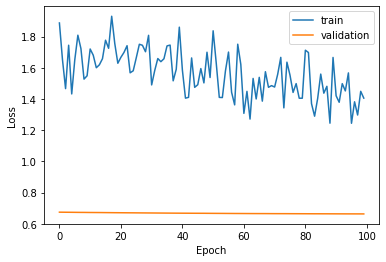

In [ ]:
# Menampilkan hasil evaluasi model dengan grafik.
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Terlihat dari grafik di atas, perbandingan loss dari train model CNN dengan PCA dan validation loss model CNN dengan PCA. Dapat dilihat, loss train model yang dihasilkan naik turun seiring bertambahnya epoch, sedangkan validation loss yang dihasilkan hanya turun sedikit seiring bertambahnya epoch.**